In [72]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
import os

import warnings
warnings.filterwarnings('ignore')

# Make dataset

In [ ]:
columns = ['tpm_unstranded', 'fpkm_unstranded', 'fpkm_uq_unstranded']
genes = ['BRCA1', 'BRCA2']
genes_dict = {g: pd.DataFrame(columns=['id', *columns]) for g in genes}

path = './data'
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.tsv'):
            file_path = os.path.join(root, file)
            id = file.split('.')[0]
            try:
                df = pd.read_csv(file_path, sep='\t', comment='#')
                df = df[~df['gene_id'].isin(['N_unmapped', 'N_multimapping', 'N_noFeature', 'N_ambiguous'])]
                for g in genes:
                    b1 = df[df['gene_name']==g]
                    d = {'id':id}
                    for c in columns:
                        d[c]=b1[c]
                    
                    genes_dict[g] = pd.concat([genes_dict[g], pd.DataFrame(d)], ignore_index=True)

                
            except Exception as e:
                print(f"Errore nella lettura del file {file_path}: {e}")

genes_dict

{'BRCA1':                                      id  fpkm_unstranded  fpkm_uq_unstranded
 0  5842a066-d158-474e-a4db-034f5797d865           7.5137              8.1128
 1  c33ecc28-d5ba-4416-b93d-445b7883b6e8           1.0558              1.2465
 2  dc857517-6b3d-4008-85a4-a2b35efb1e7a           1.1685              1.1498,
 'BRCA2':                                      id  fpkm_unstranded  fpkm_uq_unstranded
 0  5842a066-d158-474e-a4db-034f5797d865           0.5386              0.5815
 1  c33ecc28-d5ba-4416-b93d-445b7883b6e8           0.4400              0.5195
 2  dc857517-6b3d-4008-85a4-a2b35efb1e7a           0.5505              0.5417}

In [74]:
os.makedirs('./data/dataset', exist_ok=True)
for k, v in genes_dict.items():
    v.to_csv(f'./data/dataset/{k}.csv', index=False)

# Data visualization

In [79]:
def plot_info(df, column, step = 0.20):
    min_val = df[column].min() - step
    max_val = df[column].max() + step
    intervals = [round(min_val + i * step, 3) for i in range(int((max_val - min_val) / step) + 1)]
    df_cat = df.copy()
    df_cat[column] = pd.cut(df_cat[column].values, intervals)

    fig, axs = plt.subplots(2, 1, figsize=(15,8))
    #First plot
    df_cat[column].value_counts().sort_index().plot.bar(ax=axs[0], color='blue')

    #Second plot
    sns.kdeplot(df[column], ax=axs[1], color='green', fill=True)
    kde = gaussian_kde(df[column])
    x = np.linspace(df[column].min(), df[column].max(), 100)
    density = kde(x)
    max_density = density.max()
    max_density_index = density.argmax()
    max_value = x[max_density_index]

    plt.axvline(x=max_value, color='red', linestyle='--')
    plt.text(max_value + 0.1, max_density / 2, f'{max_value:.2f}', color='red')

    plt.tight_layout()
    plt.show()

In [80]:
gene_name = 'BRCA1'
BRCA1 = pd.read_csv(f'./data/dataset/{gene_name}.csv')
gene_name = 'BRCA2'
BRCA2 = pd.read_csv(f'./data/dataset/{gene_name}.csv')

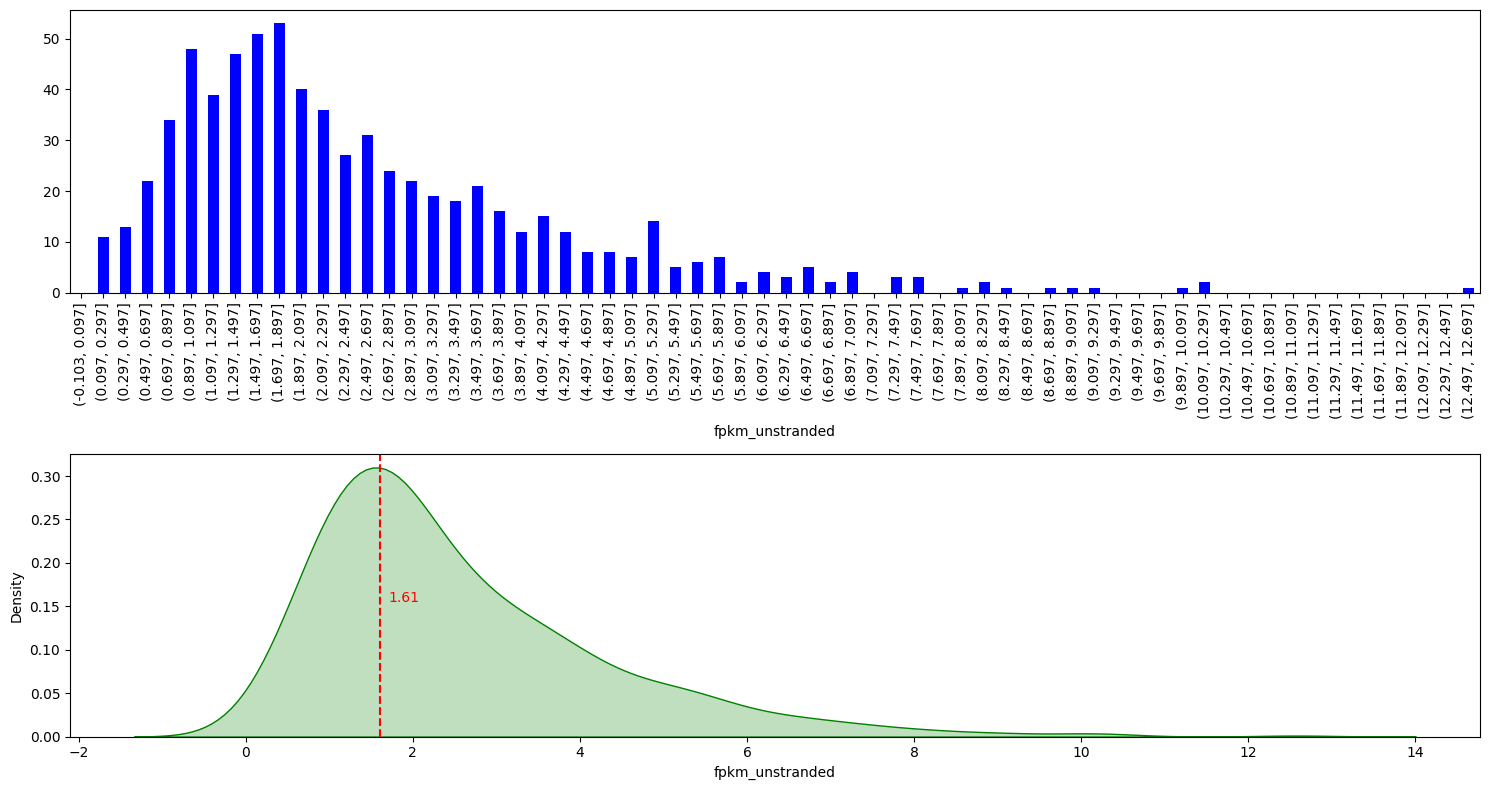

In [81]:
plot_info(BRCA1, 'fpkm_unstranded')

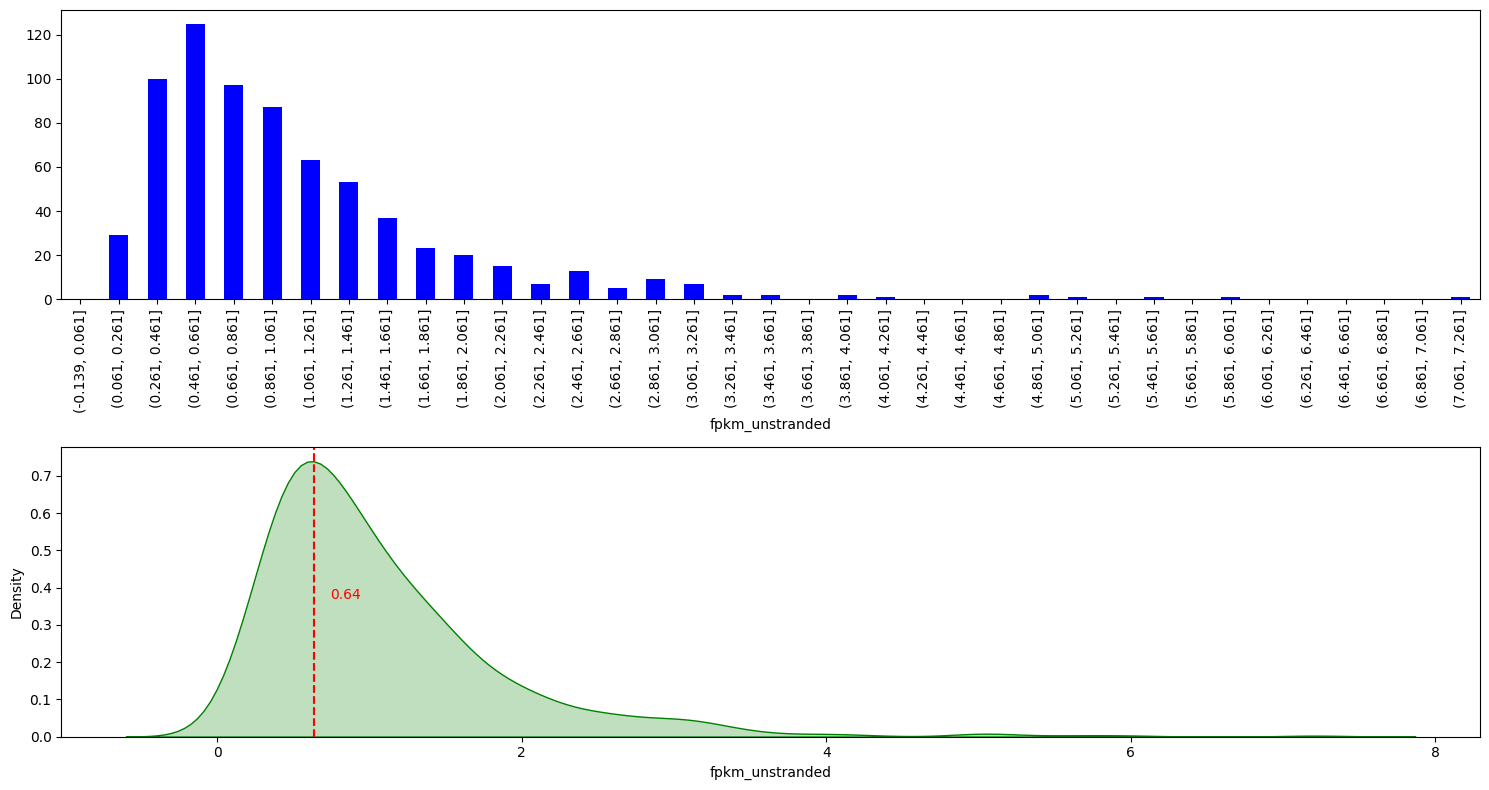

In [82]:
plot_info(BRCA2, 'fpkm_unstranded')